In [1]:
import zarr
import sys
import allel
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
callset = zarr.open_group('new_uniref_merged.zarr', mode='r')
callset

<zarr.hierarchy.Group '/' read-only>

In [3]:
list(callset['calldata'].keys())

['AD', 'DP', 'GQ', 'GT', 'PL']

In [5]:
samples = callset['samples'][:]
samples, len(samples)

(array(['AC0007-C', 'AC0017-C', 'AC0030-C', 'AC0049-C', 'AC0075-C',
        'AC0092-C', 'AC0115-C', 'AC0140-C', 'AC0174-C', 'AC0199-C',
        'VBS00001', 'VBS00002', 'VBS00003', 'VBS00004', 'VBS00006',
        'VBS00008', 'VBS00009', 'VBS00010', 'VBS00011', 'VBS00012',
        'VBS00013', 'VBS00014', 'VBS00015', 'VBS00017', 'VBS00019',
        'VBS00020', 'VBS00021', 'VBS00022', 'VBS00023', 'VBS00024',
        'VBS00025', 'VBS00026', 'VBS00029', 'VBS00030', 'VBS00031',
        'VBS00032', 'VBS00033', 'VBS00034', 'VBS00035', 'VBS00036',
        'VBS00037', 'VBS00038', 'VBS00039', 'VBS00040', 'VBS00041',
        'VBS00042', 'VBS00043', 'VBS00044', 'VBS00045', 'VBS00046',
        'VBS00047', 'VBS00048', 'VBS00049', 'VBS00050', 'VBS00051',
        'VBS00052', 'VBS00053', 'VBS00055', 'VBS00059', 'VBS00061',
        'VBS00063', 'VBS00064', 'VBS00065', 'VBS00066', 'VBS00068',
        'VBS00069', 'VBS00071', 'VBS00072', 'VBS00074', 'VBS00075',
        'VBS00076', 'VBS00078', 'VBS00079', 'VBS

In [6]:
callset['calldata/GT'][:].shape

(266548, 136, 2)

In [7]:
callset['calldata/AD'][0][0]

array([-1, -1, -1, -1], dtype=int16)

In [8]:
chrom = callset['variants/CHROM'][:]
chromunq  = np.unique(chrom)
len(chromunq)

3918

In [9]:
chromunq

array(['Pf_M76611', 'chr2L.1', 'chr2L.10', ..., 'chrX.97', 'chrX.98',
       'chrX.99'], dtype=object)

In [10]:
gt = allel.GenotypeArray(callset['calldata/GT'])
gt

<GenotypeArray shape=(266548, 136, 2) dtype=int8>
0/0 0/0 0/0 0/0 0/0 ... ./. ./. ./. ./. ./.
0/0 0/0 0/0 0/0 0/0 ... ./. ./. ./. ./. ./.
0/0 0/0 0/0 0/0 0/0 ... ./. ./. ./. ./. ./.
...
./. ./. ./. ./. ./. ... ./. ./. ./. ./. ./.
./. ./. ./. ./. ./. ... ./. ./. ./. ./. ./.
./. ./. ./. ./. ./. ... ./. ./. ./. ./. ./.

In [12]:
ismiss = gt.is_missing()

In [13]:
persnp_miss = np.count_nonzero(ismiss, axis=1)/136

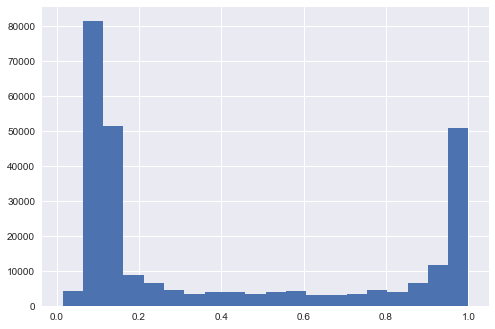

In [14]:
plt.hist(persnp_miss, bins=20);